In [1]:
import json, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
from scipy.stats import spearmanr
from IPython.display import display, Markdown

In [2]:
datapoints = json.load(open('results_trial-v1_usp_v4_gpt4-turbo.json', 'r'))
datapoints = [ dp for dp in datapoints if "predicted" in dp ]
results = pd.DataFrame.from_records(datapoints)
cm = pycm.ConfusionMatrix(results["label"].tolist(), results["predicted"].tolist(), digit=2, classes=[ 'Hallucination', 'Not Hallucination' ])

## Performance: N = 80, accuracy = 0.912, time elapsed = 0:28:15

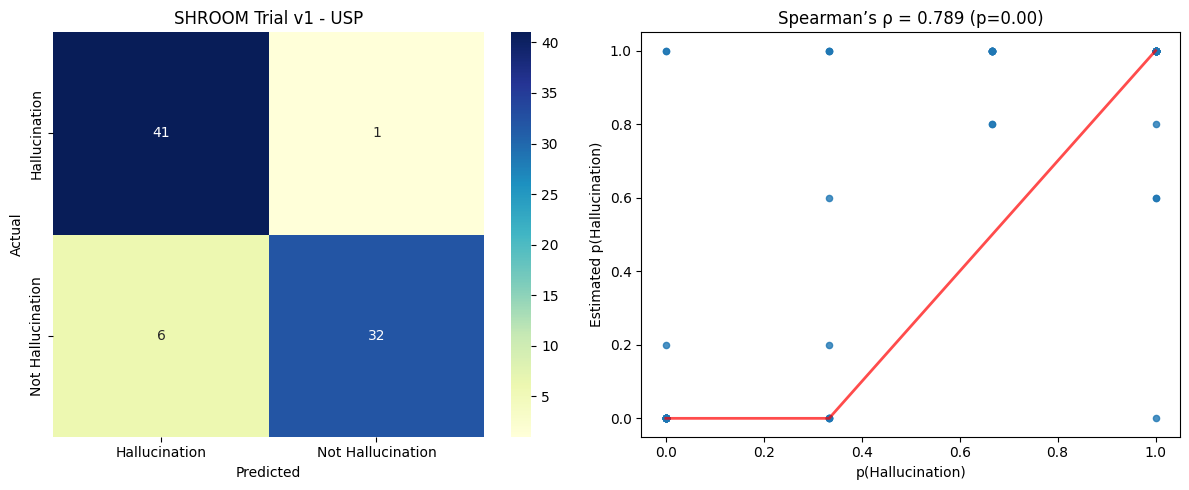

In [3]:
start = datetime.fromisoformat(results["timestamp"].min())
end = datetime.fromisoformat(results["timestamp"].max())
elapsed = end - start
display(Markdown(f'## Performance: N = {cm.POP["Hallucination"]}, accuracy = {cm.ACC["Hallucination"]:.3f}, time elapsed = {elapsed}'))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df_cm = pd.DataFrame(cm.matrix).T.fillna(0)
sns.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu", ax=axes[0])
axes[0].set_title("SHROOM Trial v1 - USP")
axes[0].set(xlabel='Predicted', ylabel='Actual')
sns.regplot(x="p(Hallucination)", y="predicted_p", data=results, scatter_kws={"s": 20}, line_kws={"color": "red", "alpha": 0.7, "lw": 2}, lowess=True, ax=axes[1])
rho, pval = spearmanr(results['p(Hallucination)'], results['predicted_p'])
axes[1].set_title(f'Spearman’s ρ = {rho:.3f} (p={pval:.2f})')
axes[1].set_xlabel('p(Hallucination)')
axes[1].set_ylabel('Estimated p(Hallucination)')
plt.tight_layout()
plt.show()


In [4]:
def display_errors(results):
    fns = results[((results["label"] == 'Hallucination') & (results["predicted"] == 'Not Hallucination'))].copy()
    fns["src"] = fns["src"].str.replace('<','&lt;')
    fns["src"] = fns["src"].str.replace('>','&gt;')
    fns = fns.drop("model", axis=1)
    fns = fns.drop("label", axis=1)
    fns = fns.drop("labels", axis=1)
    fns = fns.drop("predicted", axis=1)
    fns = fns.drop("predictions", axis=1)
    fns = fns.drop("timestamp", axis=1)
    if len(fns) > 0:
        fns_styler = fns.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False negatives'))
        display(fns_styler)
    fps = results[((results["label"] == 'Not Hallucination') & (results["predicted"] == 'Hallucination'))].copy()
    fps["src"] = fps["src"].str.replace('<','&lt;')
    fps["src"] = fps["src"].str.replace('>','&gt;')
    fps = fps.drop("model", axis=1)
    fps = fps.drop("label", axis=1)
    fps = fps.drop("labels", axis=1)
    fps = fps.drop("predicted", axis=1)
    fps = fps.drop("predictions", axis=1)
    fps = fps.drop("timestamp", axis=1)
    if len(fps) > 0:
        fps_styler = fps.style.set_properties(**{"text-align": "left", "vertical-align" : "top", "overflow-wrap": "break-word"}).hide(axis="index")
        display(Markdown(f'## False positives'))
        display(fps_styler)

display_errors(results)

## False negatives

hyp,ref,src,tgt,task,p(Hallucination),predicted_p,rationale_0,rationale_1,rationale_2,rationale_3,rationale_4
Do you have a cryon?,either,As-tu un crayon ?,Have you got a pencil?,MT,1.000000,0.000000,"The output ""Do you have a cryon?"" is not a hallucination. It is a translation error or typo, where ""crayon"" is misspelled as ""cryon."" The meaning of the sentence remains intact, and it does not introduce any information that is not present in the input or the target. The output is still asking if the person has a pencil, which is consistent with the provided input and target. Therefore, it does not meet the criteria for a hallucination as defined.","The output ""Do you have a cryon?"" is not a hallucination; rather, it is a translation error or typo. The intended translation appears to be ""Do you have a crayon?"" which would be a reasonable translation of the French input ""As-tu un crayon ?"" However, ""cryon"" is not a word in English, and it seems to be a misspelling of ""crayon."" The output does not introduce any information that is not present in the input; it merely contains a spelling mistake. Therefore, it cannot be classified as a hallucination.","The output is not a hallucination but contains a typographical error. The word ""cryon"" is likely a misspelling of ""crayon,"" which is the French word for ""pencil."" The output preserves the meaning of the input, which is asking if the person has a pencil. However, the correct translation from the input ""As-tu un crayon?"" should be ""Do you have a pencil?"" to match the target ""Have you got a pencil?"" The misspelled word in the output does not introduce new, unsupported information, but rather represents a mistake in spelling.","The output ""Do you have a cryon?"" is not a hallucination but rather a typographical error or misspelling. The word ""cryon"" seems to be a misspelling of ""crayon,"" which is the French word for ""pencil."" The correct translation from the input ""As-tu un crayon?"" to English should be ""Do you have a pencil?"" as indicated by the target. The misspelled word ""cryon"" does not introduce new information that is unsupported by the input; it is simply an incorrect rendering of the word ""pencil."" Therefore, the output is not a hallucination, but it is an error.","The output ""Do you have a cryon?"" is not a hallucination; it is a mistranslation or typographical error. The word ""cryon"" is likely a misspelling of ""crayon,"" which is the correct translation for the French word ""crayon."" The structure of the sentence is correct, and there is no additional information introduced in the output that is not present in the input. Therefore, the issue with the output is the incorrect rendering of the word ""pencil"" as ""cryon,"" not a hallucination."


## False positives

hyp,ref,src,tgt,task,p(Hallucination),predicted_p,rationale_0,rationale_1,rationale_2,rationale_3,rationale_4
(nautical) A halyard.,tgt,"Haul away , keeping strain on both parts of the halyard so that the <define> pigstick </define> remains vertical as it goes up and does n't foul the spreaders .",(nautical) A staff that carries a flag or pennant above the mast of a sailboat.,DM,0.333333,1.000000,"The output is a hallucination. The target definition specifies that a ""pigstick"" is a staff that carries a flag or pennant above the mast of a sailboat, whereas the output incorrectly defines it as a ""halyard,"" which is actually the rope or line used to hoist the pigstick, flag, or sail, not the staff itself. The output provides incorrect information that is not supported by the target reference.","The output is a hallucination. The target defines a ""pigstick"" as a staff that carries a flag or pennant above the mast of a sailboat. In contrast, the output defines it as a ""halyard,"" which is the rope or line used to hoist a sail, flag, or yard up a mast on a sailboat. The output provides incorrect information that is not supported by the target reference.","The output is a hallucination because it incorrectly defines ""pigstick"" as a ""halyard."" According to the target, a ""pigstick"" is a staff that carries a flag or pennant above the mast of a sailboat, not a halyard. A halyard is actually the rope or line used to hoist a sail, flag, or yard on a sailing ship. Therefore, the output contains information that is not supported by the reference, making it a hallucination.","The output is a hallucination. The target defines ""pigstick"" as a staff that carries a flag or pennant above the mast of a sailboat, which is a specific part of the rigging related to displaying flags. The output, however, incorrectly defines ""pigstick"" as just a ""halyard,"" which is a rope or cable used to hoist sails, flags, or yards on a sailboat. While a pigstick may be associated with a halyard because it is raised and lowered using one, the output fails to mention the crucial aspect of the pigstick being a staff for carrying flags, which is the core of its definition.","The output is a hallucination. The target defines ""pigstick"" as a staff that carries a flag or pennant above the mast of a sailboat. The output, however, defines ""pigstick"" simply as a ""halyard,"" which is a rope or line used for hoisting sails, flags, or yards on a sailboat but does not specifically mention it being a staff for carrying flags or pennants. Thus, the output contains information that is not supported by the reference, as it fails to accurately describe the function and form of a ""pigstick."""
"(Australia, New Zealand, colloquial) A hatfish.",tgt,"Noah did n't realize when he stayed on the job - he was then about 600 years old and built the ark and drove the animals in two by two , the <define> hatfish </define> and the kangaroo — — he did n't realize he was laying the foundation for an occupation for old men in New York , several years later .",(colloquial) Synonym of halibut,DM,0.333333,1.000000,"The output is a hallucination because it provides a definition of ""hatfish"" as being an Australian/New Zealand colloquial term without specifying what a ""hatfish"" actually is. The target, however, clearly states that ""hatfish"" is a colloquial synonym for halibut. Because the output fails to mention the connection to halibut, it contains information that is not supported by the target reference and thus introduces a new, unsupported definition.","The output is a hallucination because it does not contain any information that supports the claim that a ""hatfish"" is specifically related to Australia and New Zealand. Moreover, the output fails to mention that a ""hatfish"" is a colloquial synonym for a halibut, which is the core information provided in the target. The reference to Australia and New Zealand introduces information that is not present in the target ref